INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.14876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      44       360.717   0.000282627       100.565   4.648e-06       0.001       93  LS failed, Hessian reset 
      53       361.639   0.000232336       93.2344   1.523e-06       0.001      142  LS failed, Hessian reset 
      99       363.589    8.8791e-05       65.6848      0.5264      0.5264      202   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       364.732   0.000226509       95.9972   1.427e-06       0.001      339  LS failed, Hessian reset 
     199       365.293    0.00024216       70.1115      0.6541      0.6541      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       365.364   6.62799e-05       68.7914    9.17e-07       0.001      474  LS failed, Hessian reset 
     299       365.489   0.000398239       62.3169      0.7319   

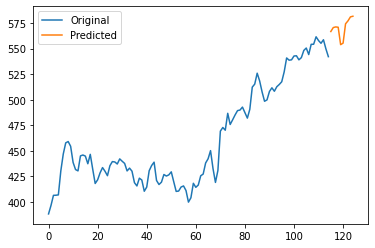

In [21]:
#Stock price prediction using prophet.
#Code generated by ChatGPT

import pandas as pd
from fbprophet import Prophet

# Assume you have already fetched the data and it is stored in a pandas dataframe named `data`
# Rename the columns to 'ds' and 'y'

data = nsepy.get_history(symbol='WIPRo', start=pd.to_datetime('2021-01-01'), end=pd.to_datetime('2021-06-21'))
data=data.reset_index()
data = data[['Date', 'Close']]
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Define the Prophet model and fit it to the data
model = Prophet()
model.fit(data)

n_future=10
# Create a dataframe to hold the future dates to predict
future = model.make_future_dataframe(periods=n_future)

# Make predictions for the future dates
forecast = model.predict(future)

# Extract the predicted values for the future dates
predicted_values = forecast['yhat'][-n_future:].values.reshape(-1, 1)

# Plot the predicted values
import matplotlib.pyplot as plt

# Shift predictions for plotting
predictions = pd.DataFrame(predicted_values, columns=['y'])
predictions.index = pd.RangeIndex(start=len(data), stop=len(data) + n_future, step=1)

# Plot the baseline and predictions
plt.plot(data['y'])
plt.plot(predictions['y'])
plt.legend(['Original', 'Predicted'])
plt.show()